![title](laybuy.png)

## Premier League 2019/20 Analysis

#### Import Libraries

In [1]:
%load_ext nb_black

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import seaborn as sns

import plotly.figure_factory as ff

<IPython.core.display.Javascript object>

In [2]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

<IPython.core.display.Javascript object>

In [3]:
l = ['Position', 'Team_Name', 'W', 'D', 'L', 'F', 'A', 'GD','Pts']
df = pd.read_csv("football_stats.csv", sep= "|", header=None)
df.columns = l

<IPython.core.display.Javascript object>

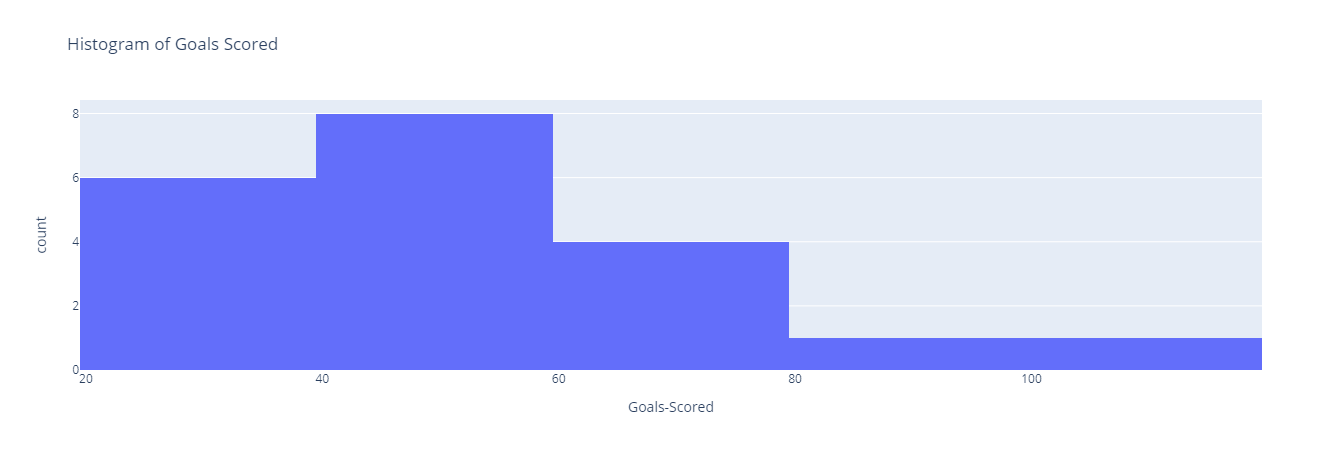

<IPython.core.display.Javascript object>

In [4]:
fig = px.histogram(df, x="F", nbins=5, title='Histogram of Goals Scored', labels={'F':'Goals-Scored'})
fig.show()

#### We could see from the above histogram most of the teams have scored goals in the range <b>40 to 60</b>

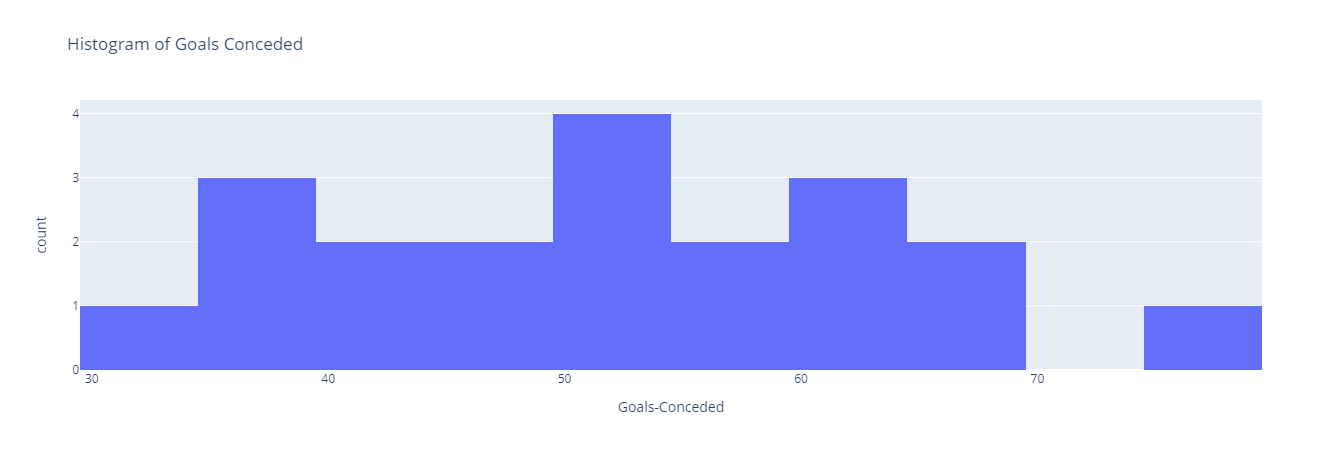

<IPython.core.display.Javascript object>

In [5]:
fig = px.histogram(df, x="A", nbins=10, title='Histogram of Goals Conceded', labels={'A':'Goals-Conceded'})
fig.show()

#### From the above graph, it is seen that most teams conceded <b>50-54</b> goals in the premier league<br>

In [6]:
# Max in all fields
df.iloc[:,2:].max()

W       32
D       14
L       27
F      102
A       75
GD      67
Pts     99
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
df.iloc[df.F.argmax(),1]

'Manchester City'

<IPython.core.display.Javascript object>

In [8]:
df.iloc[df.F.argmax(),5]

102

<IPython.core.display.Javascript object>

#### Most goals scored by a Team - <b>Manchester City<b> (102)<br>

In [9]:
df.iloc[df.A.argmax(),1]

'Norwich City'

<IPython.core.display.Javascript object>

In [10]:
df.iloc[df.A.argmax(),6]

75

<IPython.core.display.Javascript object>

#### Most goals conceded by a Team - <b>Norwich City<b> (75)<br>

In [11]:
draw = np.argwhere(df.D.tolist() == np.amax(df.D.tolist()))
df.iloc[draw.flatten().tolist(), 1].tolist()

['Wolverhampton Wanderers', 'Arsenal', 'Brighton and Hove Albion']

<IPython.core.display.Javascript object>

In [12]:
df.iloc[draw.flatten().tolist(), 3]

6     14
7     14
14    14
Name: D, dtype: int64

<IPython.core.display.Javascript object>

#### Most draw matches - <b>'Wolverhampton Wanderers', 'Arsenal', 'Brighton and Hove Albion'<b> (14)<br>


In [13]:
df["W/L"] = round(df['W']/df['L'], 2)  # Win / Loss ratio

<IPython.core.display.Javascript object>

In [14]:
print(f"Highest W/L - {df.iloc[df['W/L'].argmax(),1]}, {df.iloc[df['W/L'].argmax(),-2]}")
print(f"Lowest W/L - {df.iloc[df['W/L'].argmin(),1]}, {df.iloc[df['W/L'].argmin(),-2]}")


Highest W/L - Liverpool, 99
Lowest W/L - Norwich City, 21


<IPython.core.display.Javascript object>

#### Highest Win / Loss ratio - <b>Liverpool</b> - (10.67) <br>

In [15]:
df['Goal_Ratio'] = round(df['F']/df['A'], 2)

<IPython.core.display.Javascript object>

In [16]:
print(f"Highest Goal ratio - {df.iloc[df.Goal_Ratio.argmax(),1]},{df.iloc[df.Goal_Ratio.argmax(),-1]}")
print(f"Lowest Goal ratio - {df.iloc[df.Goal_Ratio.argmin(),1]},{df.iloc[df.Goal_Ratio.argmin(),-1]}")

Highest Goal ratio - Manchester City,2.91
Lowest Goal ratio - Norwich City,0.35


<IPython.core.display.Javascript object>

#### Highest Goal ratio - <b>Manchester City</b> (2.91) <br> 

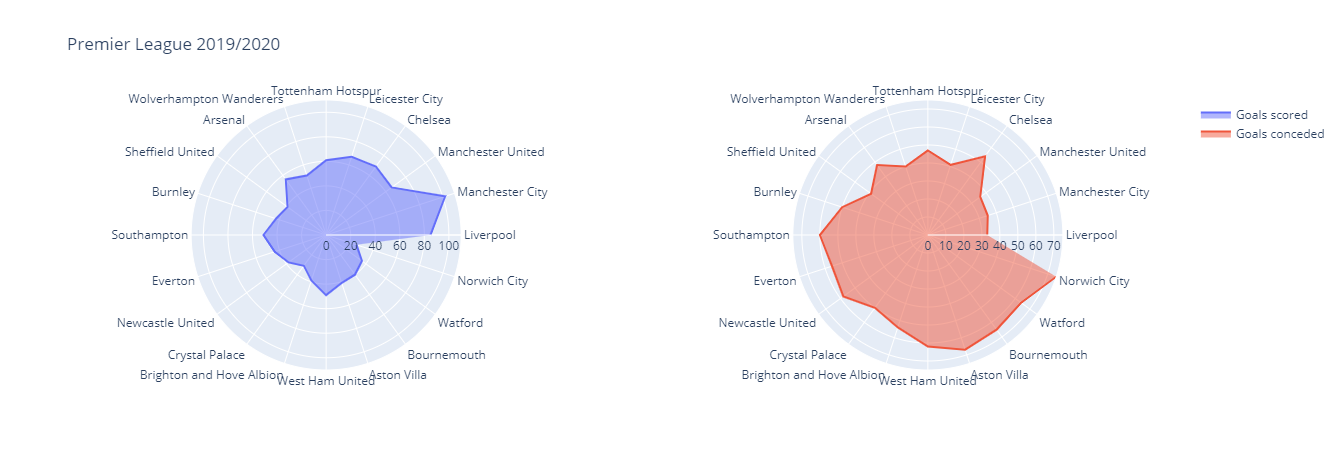

<IPython.core.display.Javascript object>

In [17]:
# trace0 = go.Scatterpolar(
#     r=df.F.values,
#     theta=df.Team_Name,
#     fill="toself",
#     name="Goals Scored",
# )
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "Goals scored",
      r = df.F.tolist(),
      theta = df.Team_Name,
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
      name = "Goals conceded",
      r = df.A,
      theta = df.Team_Name,
    ), 1, 2)

fig.update_traces(fill='toself')

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 110])), title= "Premier League 2019/2020")

fig.show()

#### The above polar graph shows how each team has scored goals and conceded goals<br>

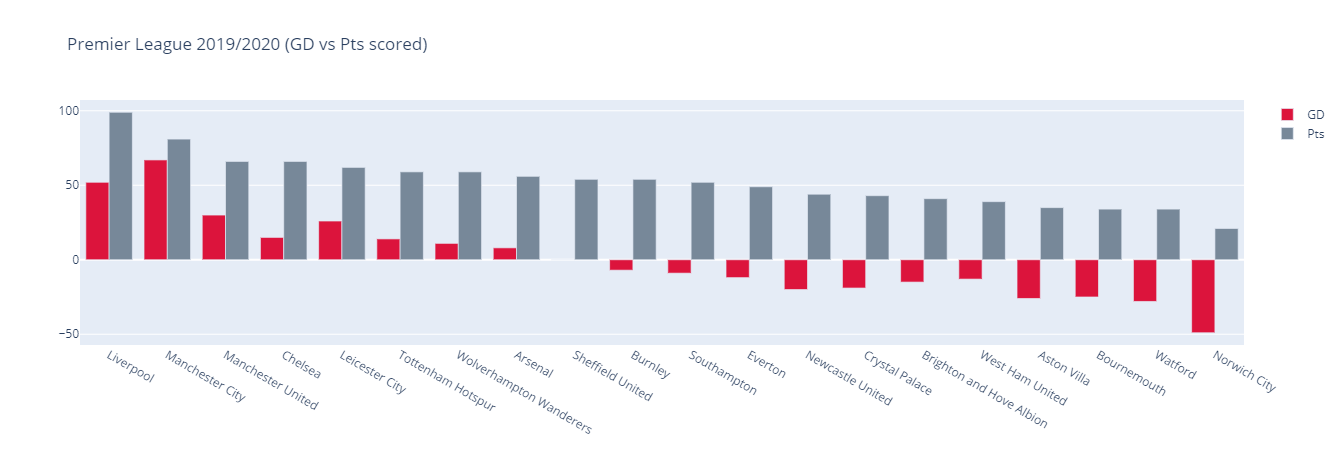

<IPython.core.display.Javascript object>

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df.Team_Name, y=df.GD,
                marker_color='crimson',
                name='GD'))
fig.add_trace(go.Bar(x=df.Team_Name, y=df.Pts,
                base=0,
                marker_color='lightslategrey',
                name='Pts'
                ))

fig.update_layout(title= "Premier League 2019/2020 (GD vs Pts scored)")

fig.show()

Text(0.5, 1.08, 'Distribution of all fields for top 6 teams')

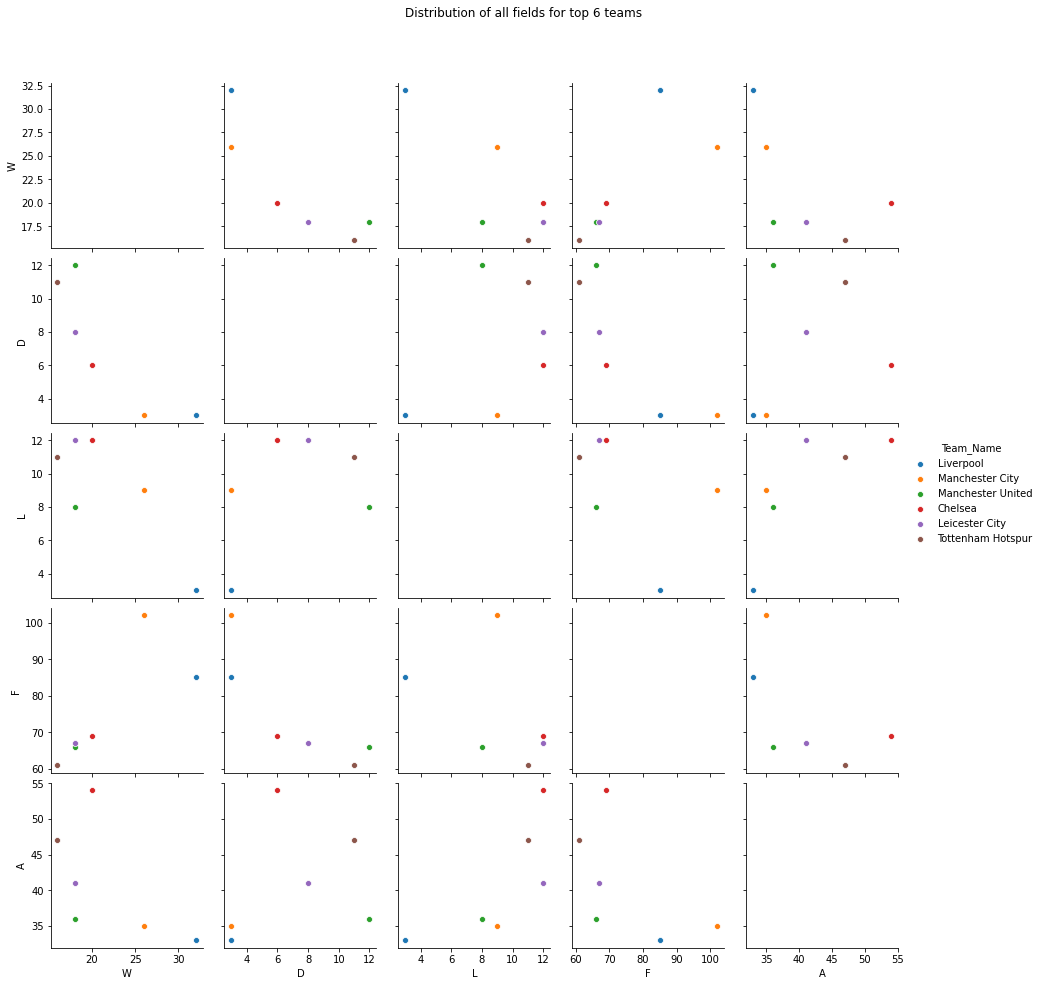

<IPython.core.display.Javascript object>

In [19]:
g = sns.pairplot(df[['W','D','L','F','A','Team_Name']].iloc[:6], hue='Team_Name')
g.fig.suptitle("Distribution of all fields for top 6 teams", y=1.08)

#### The above graph shows how each of the continuous features are spread, well lets dive in and understand the plot in a better way <br>

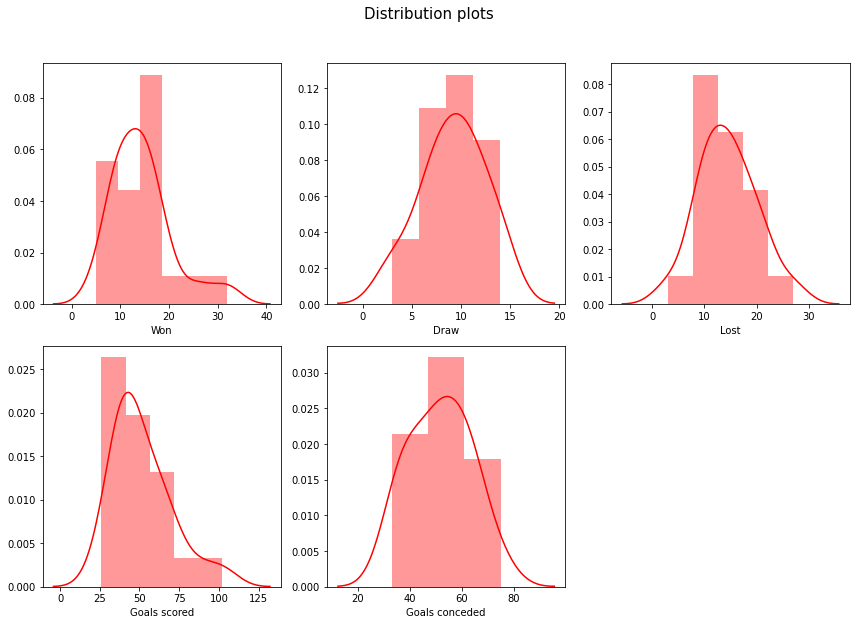

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(12, 8))
plt.suptitle('Distribution plots', y=1.08, size=15)

plt.subplot(2, 3, 1)

sns.distplot(
    df.W,
    color="r",
    axlabel="Won",
)


plt.subplot(2, 3, 2)
sns.distplot(
    df.D,
    color="r",
    axlabel="Draw",
)
plt.subplot(2, 3, 3)
sns.distplot(
    df.L,
    color="r",
    axlabel="Lost",
)


plt.subplot(2, 3, 4)
sns.distplot(
    df.F,
    color="r",
    axlabel="Goals scored",
)

plt.subplot(2, 3, 5)
sns.distplot(
    df.A,
    color="r",
    axlabel="Goals conceded",
)
plt.tight_layout()

plt.show()

#### All of them are more or less normally distributed except in the 'Won' graph we could see one particular interval has comparatively higher value<br>

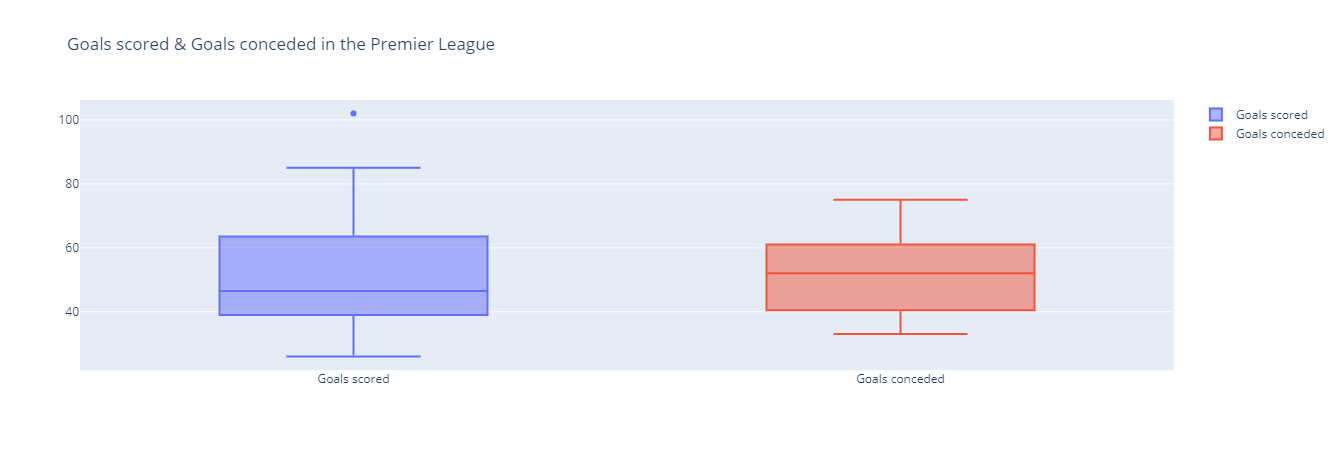

<IPython.core.display.Javascript object>

In [21]:
trace0 = go.Box(
                y=df.F,
                name="Goals scored",
                text = df.Team_Name
                )
trace1 = go.Box(
                y=df.A,
                name="Goals conceded",
                text = df.Team_Name
                )

layout = go.Layout(title="Goals scored & Goals conceded in the Premier League")
data = [trace0, trace1]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

#### The median goals scored in the premier league 2019/20 is <b>47</b>, the majority of the teams have scored more than the median
we could observe the outlier in the goals scored (102) <b>Manchester city</b> has been a phenomenal team when it comes to scoring goals 

### Win/Loss ratio vs Goals scored

In [22]:
df.iloc[:,[0,1,5,9]].style.background_gradient('Reds', subset = ['W/L', 'F'])

,Position,Team_Name,F,W/L
0,1,Liverpool,85,10.670000
1,2,Manchester City,102,2.890000
2,3,Manchester United,66,2.250000
3,4,Chelsea,69,1.670000
4,5,Leicester City,67,1.500000
5,6,Tottenham Hotspur,61,1.450000
6,7,Wolverhampton Wanderers,51,1.670000
7,8,Arsenal,56,1.400000
8,9,Sheffield United,39,1.170000
9,10,Burnley,43,1.070000


<IPython.core.display.Javascript object>

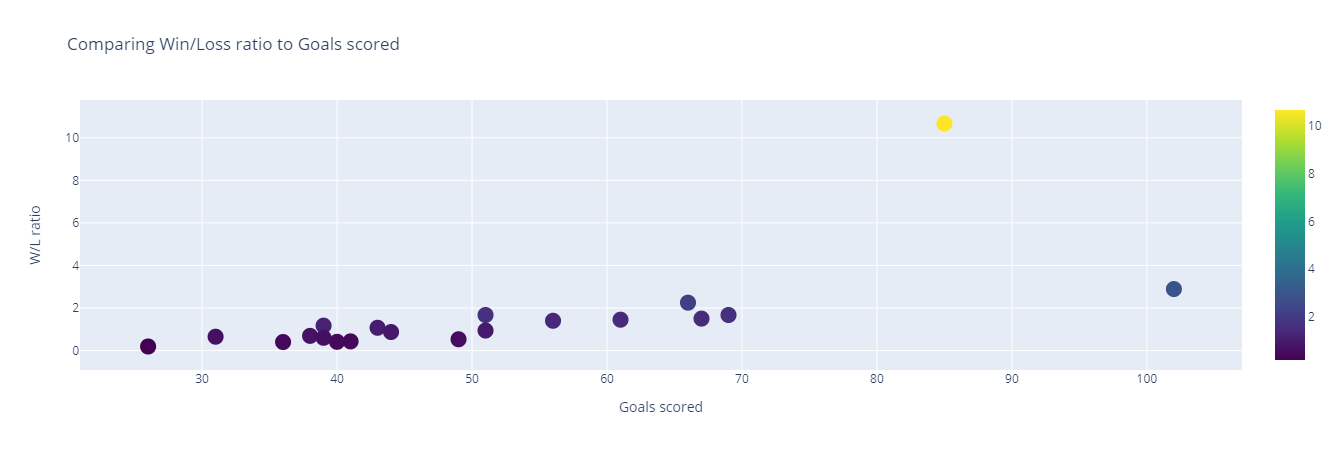

<IPython.core.display.Javascript object>

In [23]:
trace2 = go.Scatter(
                    x=df['F'],
                    y=df['W/L'],
                    mode='markers',
                    marker=dict(size=16,
                                color=np.random.randn(500), 
                                colorscale='Viridis', 
                                showscale=True
                                ),
                    marker_color=df['W/L'],
                    text=df['Team_Name']
                    )

data = [trace2]
layout = dict(
    title="Comparing Win/Loss ratio to Goals scored",
    xaxis=dict(title="Goals scored", ticklen=5, zeroline=False),
    yaxis=dict(title="W/L ratio", ticklen=5, zeroline=False),
)
fig = dict(data=data, layout=layout)
iplot(fig)

#### <b>Liverpool</b> - one of the toughest teams to beat (as per the above graph), 'for every 10 matches they win they lose 1 match' <b> Unbelievably consistent</b> 🔥

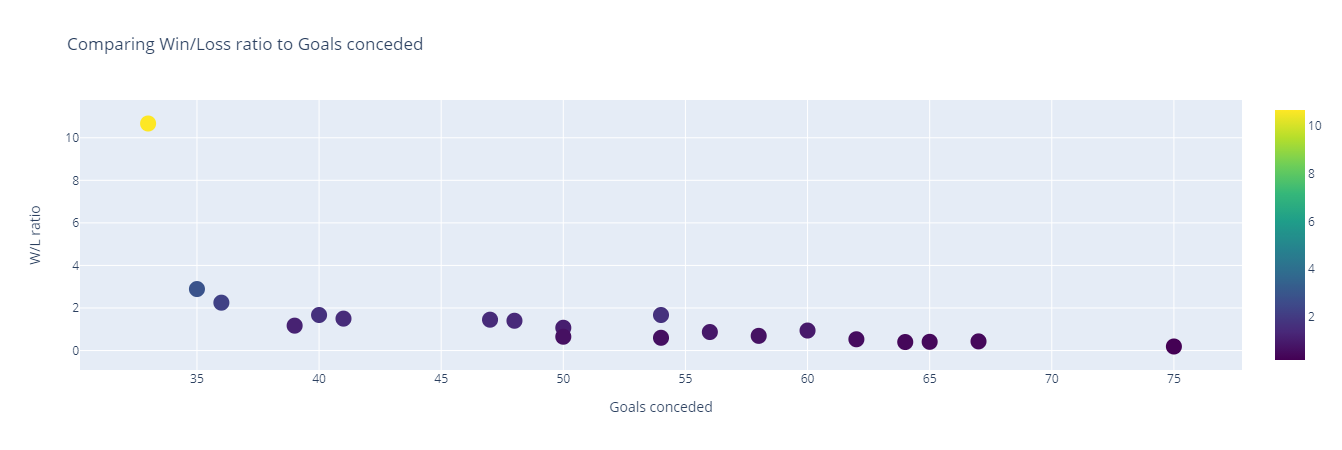

<IPython.core.display.Javascript object>

In [24]:
trace2 = go.Scatter(
                    x=df['A'],
                    y=df['W/L'],
                    mode='markers',
                    marker=dict(size=16,
                                color=np.random.randn(500), 
                                colorscale='Viridis',
                                showscale=True
                                ),
                    marker_color=df['W/L'],
                    text=df['Team_Name']
                    )

data = [trace2]
layout = dict(
    title="Comparing Win/Loss ratio to Goals conceded",
    xaxis=dict(title="Goals conceded", ticklen=5, zeroline=False),
    yaxis=dict(title="W/L ratio", ticklen=5, zeroline=False),
)
fig = dict(data=data, layout=layout)
iplot(fig)

#### Tough to hit goals against <b>Liverpool</b>, but <b>chelsea</b> is a team to be noted here with conceding 54 goals (above median) and still maintaining the W/L ratio of 1.67 (Looks like they are the most entertaining team)

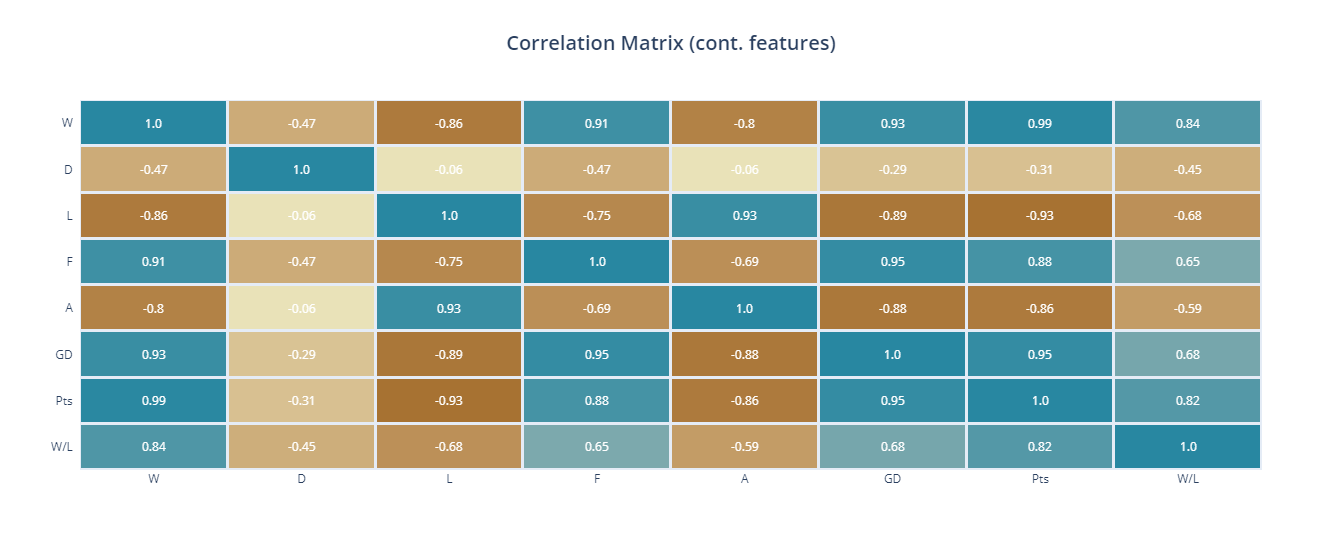

<IPython.core.display.Javascript object>

In [25]:
corr = df.iloc[:,2:-1].corr()
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix (cont. features)<b>',
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=550, height=550,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()

#### More than scoring goals to winning the match (F vs W), conceding goals has higher impact to losing the match (A vs L) <br>

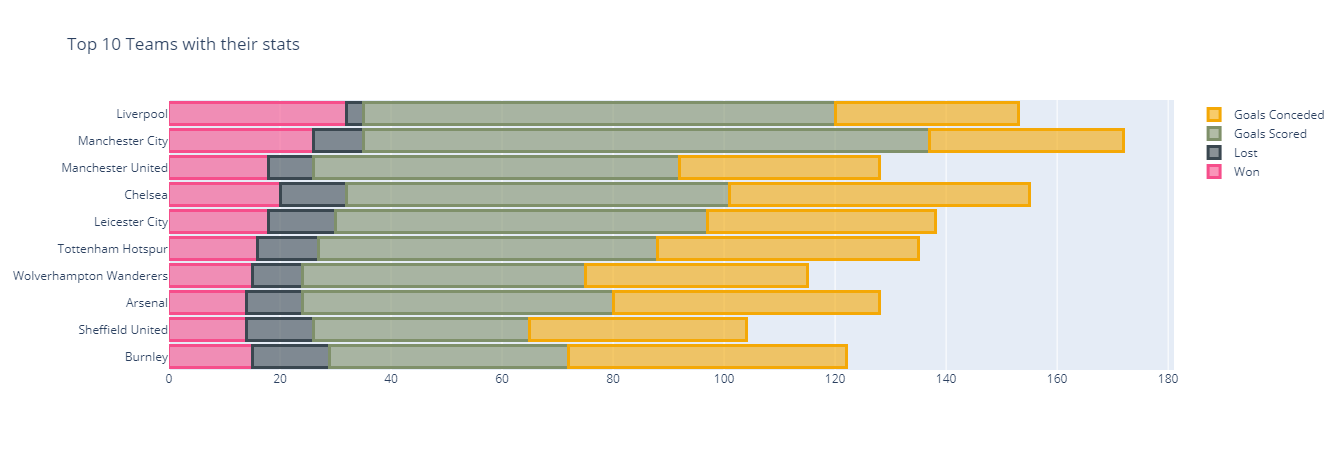

<IPython.core.display.Javascript object>

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df.iloc[:10].Team_Name.tolist()[::-1],
    x=df.iloc[:10].W.tolist()[::-1],
    name='Won',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=df.iloc[:10].Team_Name.tolist()[::-1],
    x=df.iloc[:10].L.tolist()[::-1],
    name='Lost',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=df.iloc[:10].Team_Name.tolist()[::-1],
    x=df.iloc[:10].F.tolist()[::-1],
    name='Goals Scored',
    orientation='h',
    marker=dict(
        color='rgba(127, 144, 106, 0.6)',
        line=dict(color='rgba(127, 144, 106, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=df.iloc[:10].Team_Name.tolist()[::-1],
    x=df.iloc[:10].A.tolist()[::-1],
    name='Goals Conceded',
    orientation='h',
    marker=dict(
        color='rgba(244, 168, 6, 0.6)',
        line=dict(color='rgba(244, 168, 6, 1)', width=3)
    )
))

fig.update_layout(title='Top 10 Teams with their stats',barmode='stack')
fig.show()

#### Ranking based on Goal ratio

In [27]:
d = df.iloc[:,[1,-1]].sort_values(by = 'Goal_Ratio', ascending=False).reset_index(drop = True)#.style.background_gradient('Reds')
d.index  = d.index + 1
d.style.background_gradient('Reds')

,Team_Name,Goal_Ratio
1,Manchester City,2.910000
2,Liverpool,2.580000
3,Manchester United,1.830000
4,Leicester City,1.630000
5,Tottenham Hotspur,1.300000
6,Chelsea,1.280000
7,Wolverhampton Wanderers,1.270000
8,Arsenal,1.170000
9,Sheffield United,1.000000
10,Burnley,0.860000


<IPython.core.display.Javascript object>

#### Ranking based on Win/Loss ratio

In [28]:
d = df.iloc[:,[1,-2]].sort_values(by = 'W/L', ascending=False).reset_index(drop = True)#.style.background_gradient('Reds')
d.index = d.index + 1
d.style.background_gradient('Reds')

,Team_Name,W/L
1,Liverpool,10.670000
2,Manchester City,2.890000
3,Manchester United,2.250000
4,Chelsea,1.670000
5,Wolverhampton Wanderers,1.670000
6,Leicester City,1.500000
7,Tottenham Hotspur,1.450000
8,Arsenal,1.400000
9,Sheffield United,1.170000
10,Burnley,1.070000


<IPython.core.display.Javascript object>

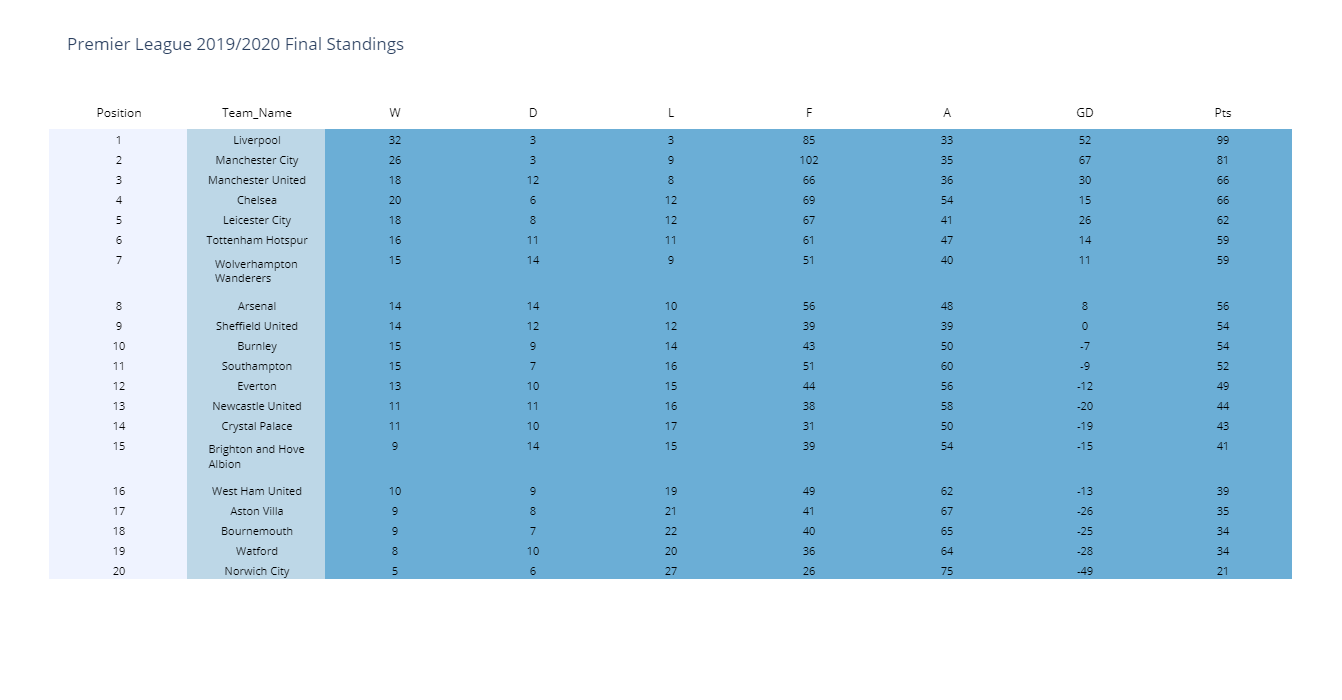

<IPython.core.display.Javascript object>

In [29]:
colors = ['rgb(239, 243, 255)', 'rgb(189, 215, 231)', 'rgb(107, 174, 214)'
          ]

fig = go.Figure(data=[go.Table(
  header=dict(
    values=list(df.columns)[:-2],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Position, df.Team_Name, df.W, df.D, df.L, df.F, df.A, df.GD, df.Pts],
    line_color=colors, fill_color=colors,
    align='center', font=dict(color='black', size=11)
  ))
])

fig.update_layout(
    title = "Premier League 2019/2020 Final Standings",
    autosize=False,
    width=1300,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))

fig.show()

#### Thank you for the task!
Ps: I am not a football fan 😃 but it was interesting to see how teams have performed.